##PROJECT  TITLE: UNIVERSITY ADMIT ELIGIBILITY PREDICATOR


##TEAM ID:PNT2022TMID34862

## TEAM LEADER : S.RAJAMANI
## TEAM MEMBERS: R.MATHAN, K.VIGNESH, B.VISHWA

# Import Modules

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#Loading Dataset Into the Program

In [ ]:
data = pd.read_csv("/content/Admission_Predict.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
data.drop(["Serial No."], axis=1, inplace=True)

In [ ]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
data.isnull().sum() 

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

#VISUALIZATION

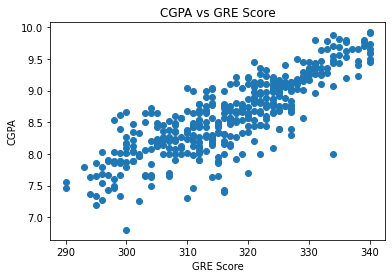

In [ ]:
plt.scatter(data['GRE Score'],data['CGPA'])
plt.title('CGPA vs GRE Score')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.show()

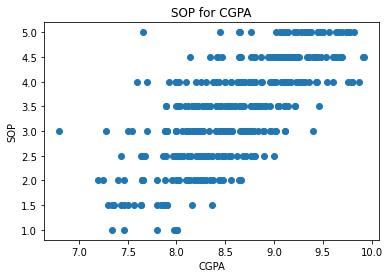

In [ ]:
plt.scatter(data['CGPA'],data['SOP'])
plt.title('SOP for CGPA')
plt.xlabel('CGPA')
plt.ylabel('SOP')
plt.show()


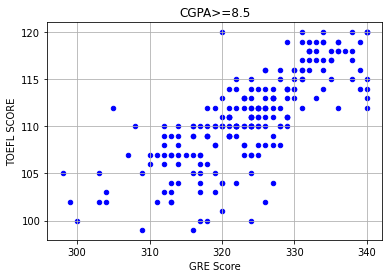

In [ ]:
data[data.CGPA >= 8.5].plot(kind='scatter', x='GRE Score', y='TOEFL Score',color="BLUE")

plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8.5")
plt.grid(True)

plt.show()

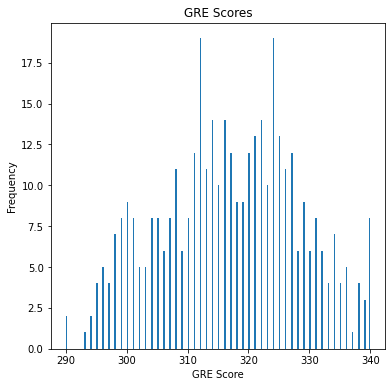

In [ ]:
data["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))

plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")

plt.show()

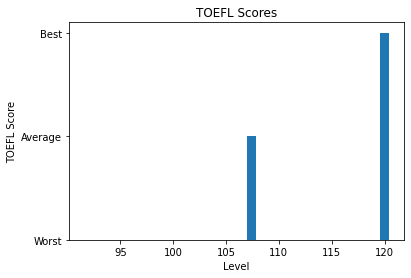

In [ ]:
p = np.array([data["TOEFL Score"].min(),data["TOEFL Score"].mean(),data["TOEFL Score"].max()])
r = ["Worst","Average","Best"]
plt.bar(p,r)

plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")

plt.show()


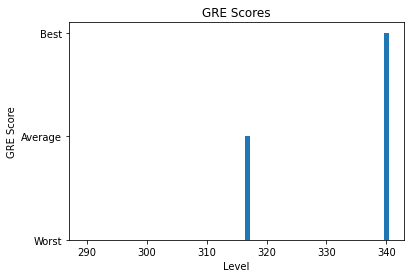

In [ ]:
g = np.array([data["GRE Score"].min(),data["GRE Score"].mean(),data["GRE Score"].max()])
h = ["Worst","Average","Best"]
plt.bar(g,h)

plt.title("GRE Scores")
plt.xlabel("Level")
plt.ylabel("GRE Score")

plt.show()

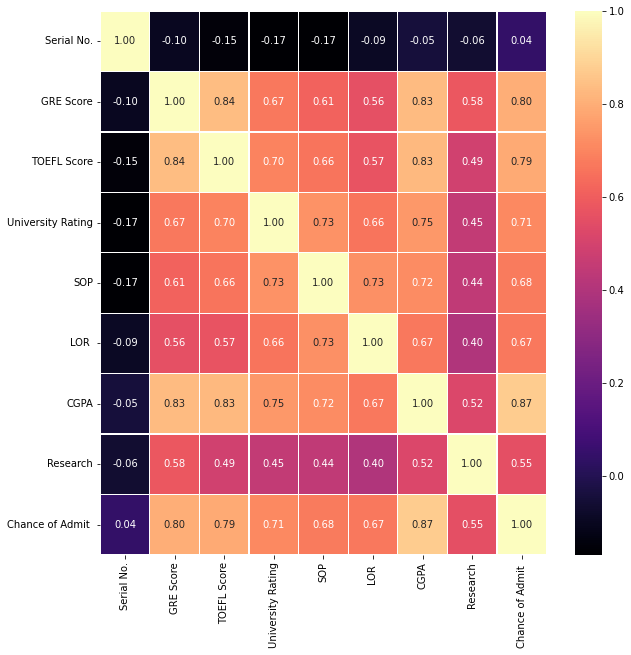

In [ ]:
plt.figure(figsize=(10, 10))

sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")

plt.show()


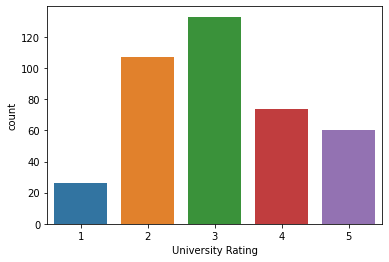

In [ ]:
data.Research.value_counts()

sns.countplot(x="University Rating",data=data)

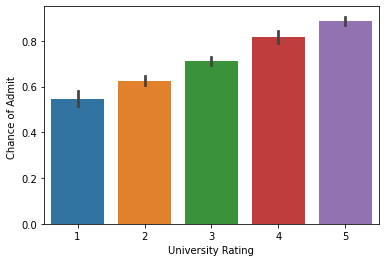

In [ ]:
sns.barplot(x="University Rating", y="Chance of Admit ", data=data)

# TRAINING AND TESTING SPLIT

In [ ]:
X=data.drop(['Chance of Admit '],axis=1) #input data_set
y=data['Chance of Admit '] #output labels

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

#MODELING AND TRAINING

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
rgr = GradientBoostingRegressor()
rgr.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
rgr.score(X_test,y_test)

0.8657274986399139

In [ ]:
y_predict=rgr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))


Mean Absolute Error: 0.0383297053585479
Mean Squared Error: 0.002370845826723335
Root Mean Squared Error: 0.048691332151865954


In [ ]:
y_train = (y_train>0.5)
y_test = (y_test>0.5)

In [ ]:
from sklearn.linear_model._logistic import LogisticRegression

lore = LogisticRegression(random_state=0, max_iter=1000)

lr = lore.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print('Accuracy Score:', accuracy_score(y_test, y_pred))  
print('Recall Score:', recall_score(y_test, y_pred))  
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
print('Confussion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy Score: 0.9666666666666667
Recall Score: 0.9824561403508771
ROC AUC Score: 0.8245614035087719
Confussion Matrix:
 [[ 2  1]
 [ 1 56]]


#Save the model

In [ ]:
import pickle

In [38]:
pickle.dump(lr, open("university.pkl", "wb")) #logistic regression model

# IBM Deployment

In [ ]:
pip install -U ibm-watson-machine-learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 18.0 MB/s 
     |████████████████████████████████| 51 kB 841 kB/s 
     |████████████████████████████████| 824 kB 68.8 MB/s 
     |████████████████████████████████| 133 kB 69.8 MB/s 
     |████████████████████████████████| 547 kB 60.0 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72564 sha256=688617018fd485f7f5e024659c4309173f493c3bf9bb4998d2ba1783d8829e75
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501011 sha256=4fb9e6bc8fad7493cfc756c57b8e34ab8619e462ea28be7ef8b832966bade0c1
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos

In [ ]:
from ibm_watson_machine_learning import APIClient
import json

# Authenticate and Set Space

In [ ]:
uml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "7ZFh7xrletLyzWXx-gpDytZRDtMFbOfWej8jkpLfu4A_"
}

In [ ]:
client = APIClient(uml_credentials)

In [ ]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    idr = []
    for i in space['resources']:
        idr.append(i['metadata']['id'])
    return idr   

In [ ]:
space_uid = guid_from_space_name(client, "university")
print(space_uid[1])

044caf31-9347-4048-849c-a37d00605665


In [ ]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ---------------------------------------------  ------------------------
ID                                    NAME                                           CREATED
044caf31-9347-4048-849c-a37d00605665  university admit eligibility predicator_demo   2022-11-09T02:16:12.151Z
1e35a435-4b85-4d18-8b53-ab95956702d1  University admit eligibility prediction _demo  2022-11-08T06:12:15.392Z
------------------------------------  ---------------------------------------------  ------------------------


In [ ]:
SPACE_ID= "044caf31-9347-4048-849c-a37d00605665"

In [ ]:
client.set.default_space(SPACE_ID)

'SUCCESS'

In [ ]:
client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1

# Save and Deploy the model

In [ ]:
import sklearn
sklearn.__version__

'1.0.2'

In [ ]:
MODEL_NAME = 'university'
DEPLOYMENT_NAME = 'uni'
DEMO_MODEL = lr

In [ ]:
software_spec_uid = client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [ ]:
model_props = {
    client.repository.ModelMetaNames.NAME: MODEL_NAME,
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0 ',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}

In [ ]:
model_details = client.repository.store_model(
    model = DEMO_MODEL,
    meta_props = model_props,
    training_data = X_train,
    training_target = y_train 
)
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Chance of Admit ',
  'schemas': {'input': [{'fields': [{'name': 'GRE Score', 'type': 'int64'},
      {'name': 'TOEFL Score', 'type': 'int64'},
      {'name': 'University Rating', 'type': 'int64'},
      {'name': 'SOP', 'type': 'float64'},
      {'name': 'LOR ', 'type': 'float64'},
      {'name': 'CGPA', 'type': 'float64'},
      {'name': 'Research', 'type': 'int64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-09T02:12:20.811Z',
  'id': '0476a44a-6132-47dc-aecf-1be682d1d9c6',
  'modified_at': '2022-11-09T02:12:23.699Z',
  'name': 'university',
  'owner': 'IBMid-6620040IVA',
  'resource_key': '3ab39851-e74e-42ff-a972-07ebd6d1d14e',
  'space_id': '1e35a435-4b85-4d18-8b53-ab95956702d1'},
 'system': {'warnings': []}}

In [ ]:
model_id = client.repository.get_model_id(model_details)
model_id

'0476a44a-6132-47dc-aecf-1be682d1d9c6'

In [ ]:
deployment_props = {
    client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

deployment = client.deployments.create(
     artifact_uid = model_id,
     meta_props = deployment_props
)



#######################################################################################

Synchronous deployment creation for uid: '0476a44a-6132-47dc-aecf-1be682d1d9c6' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='d70ffd67-da81-470b-a0a6-c34cb87b56d9'
------------------------------------------------------------------------------------------------


